In [4]:
import requests 
from bs4 import BeautifulSoup as bsoup

## Dictionary of Article links in Blog

In [92]:
def get_articles_dataquest(url1):
    result = requests.get(url1)
    page = result.content
    soup = bsoup(page, 'html.parser')
    
    # get all links of article
    articles = soup.find_all("article", "post")
    articles_links = {}
    for article in articles:
        heading = article.find("h2", "post-title")
        title = heading.string.strip()
        articles_links[title] = "https://www.dataquest.io" + heading.find("a").attrs['href']
    
    # collect data from each article
    articles_data = []
    for title, link in articles_links.items():
        page = bsoup(requests.get(link).content, 'html.parser')
        article = {}
        article['title'] = page.find("h1", class_="post-title").string.strip()
        article['link'] = link 
        section = page.find("section", class_="post-content")
        paragraphs = section.find_all("p")
        paras = ' '
        for para in paragraphs:
            paras = paras + ' ' + para.getText()
        article['content'] = paras

        if section.find("code"):
            article['code'] = 1
        else:
            article['code'] = 0

        articles_data.append(article) 
        
    return articles_data

In [96]:
# scraping data from dataquest blog (TODO :generalize pages)
dataquest_data = get_articles_dataquest("https://www.dataquest.io/blog")
dataquest_data2 = get_articles_dataquest("https://www.dataquest.io/blog/page2")
dataquest_data3 =  get_articles_dataquest("https://www.dataquest.io/blog/page3")
dataquest_data += dataquest_data2 + dataquest_data3

## k-Means clustering

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

# get feature vectors of documents
vectorizer = TfidfVectorizer(max_df= 0.8, \
                             max_features = 10000, min_df = 0.2,\
                             stop_words = 'english', use_idf = True)

%time features = vectorizer.fit_transform([article['content'] for article in dataquest_data])

CPU times: user 70 ms, sys: 0 ns, total: 70 ms
Wall time: 78.2 ms


In [116]:
features.shape
from sklearn.cluster import KMeans
num_clusters = 3
km = KMeans(n_clusters = num_clusters)
%time km.fit(features)
clusters = km.labels_.tolist()


CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 39.4 ms


In [126]:
group = {0:[], 1:[], 2:[]}
for (i,cluster) in enumerate(clusters):
    group[cluster].append([dataquest_data[i]['title'], dataquest_data[i]['code']])

array(<1x398 sparse matrix of type '<class 'numpy.float64'>'
	with 121 stored elements in Compressed Sparse Row format>, dtype=object)

ValueError: setting an array element with a sequence.

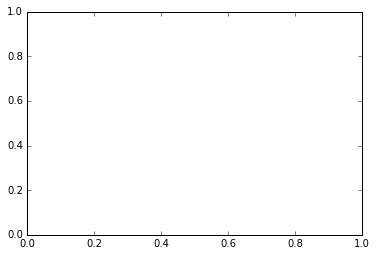

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(features[:,0], features[:,1], 'ro')


In [106]:
import json
with open('dataquest_data.json', 'w') as outfile:
    for data in dataquest_data:
        json.dump(data, outfile, indent=4)

In [77]:
?section.find